In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-df/Titanic.csv


Сначала мы считываем наш датасет

In [4]:
df = pd.read_csv('/kaggle/input/titanic-df/Titanic.csv')

Выводим, чтобы посмотреть количество строк и колонок> 
* PassengerId	- ID пассажира
* Survived - выжил/не вижил
* Pclass - класс билета
* Name - ФИО
* Sex - пол
* Age - возраст
* SibSp - количество братьев и сестер/ супругов
* Parch - количество родителей и детей
* Ticket - номер билета
* Fare - стоимость билета
* Cabin - номер кабины
* Embarked - порт

In [5]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Видим, что в датасете 891 строка и 12 колонок

Дальше мы смотрим сколько и в каких местах есть пропуски

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 пропусков в колонке возраста, что сильно критично, поэтому просто удалить их мы не можем. 687 пропусков в колонке кабин, что тоже очень много, и 2 пропуска в колонке портов

Далее мы заполняем эти пропуски и снова выводим для проверки

In [7]:
# Заполнение медианой по Pclass и Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

#Заполнение модой по Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Заполнение пропусков Cabin
df['Cabin'] = df['Cabin'].fillna('Unknown')

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Ниже мы рассчитываем корреляцию для числовых колонок. Мы видим, что самая высокая корреляция с Fare, то есть чем выше цена билета, тем более вероятно, что пассажир выжил. А самая низкая корреляция с колонкой Pclass, то есть чем ниже класс билета (1 - самый высокий, 3 - самый низкий), тем более вероятно, что пассажир не выжил.

In [8]:
# Рассчет корреляции для числовых колонок с 'Survived'
correlation_matrix = df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

print("Корреляция с 'Survived':")
print(correlation_matrix)

Корреляция с 'Survived':
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
Pclass        -0.338481
Name: Survived, dtype: float64


Для начала посмотрим сколько всего было мужчин и женщин в каждом классе

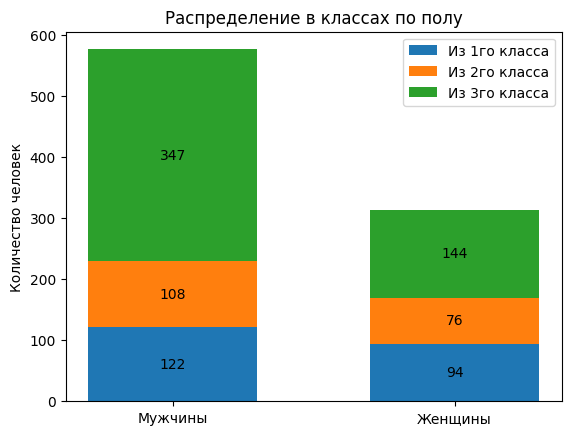

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#количество мужчин и женщин из 1 класса
males_from_1st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==1))])
females_from_1st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==1))])

#количество мужчин и женщин из 2 класса
males_from_2st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==2))])
females_from_2st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==2))])

#количество мужчин и женщин из 3 класса
males_from_3st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==3))])
females_from_3st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==3))])

#Визуализация
count_1st_class = {
    'Из 1го класса': [males_from_1st_class, females_from_1st_class],
    'Из 2го класса': [males_from_2st_class, females_from_2st_class],
    'Из 3го класса': [males_from_3st_class, females_from_3st_class]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in count_1st_class.items():
    p=ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label = key, bottom=bottom)
    bottom+=count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение в классах по полу')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Видим, что в 1 классе было 122 мужчины и 94 женщины, во 2 классе - 108 мужчин и 76 женщин и в 3 классе - 347 мужчин и 144 женщины. Больше всего человек было в 3 классе.

Предполагается, что в независимости от класса выживало больше женщин. Для этого рассмотрим каждый класс

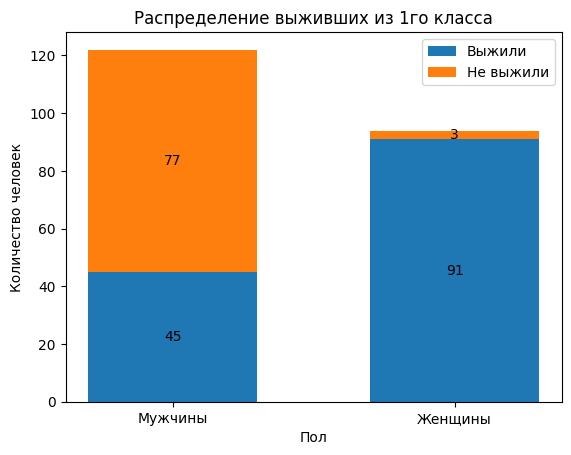

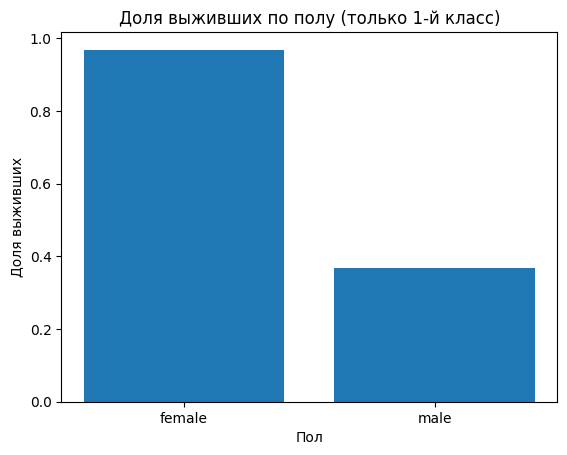

В 1-м классе доля выживших составила: Женщины: 96.81%, Мужчины: 36.89%.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#количество выживших мужчин и женщин из 1 класса
males_from_1st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==1))])
females_from_1st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==1))])
survived_males_1st=len(df.loc[((df['Sex']=='male') & (df['Pclass']==1) & (df['Survived']==1))])
survived_females_1st=len(df.loc[((df['Sex']=='female') & (df['Pclass']==1)& (df['Survived']==1))])

#Визуализация
count_1st_class = {
    'Выжили': [survived_males_1st, survived_females_1st],
    'Не выжили': [males_from_1st_class-survived_males_1st, females_from_1st_class-survived_females_1st]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in count_1st_class.items():
    p=ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label = key, bottom=bottom)
    bottom+=count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших из 1го класса')
ax.set_ylabel('Количество человек')
ax.set_xlabel('Пол')
ax.legend()
plt.show()

#Рассчитываем долю выживших

# Пассажиры только 1го класса
df_class1 = df[df['Pclass'] == 1].copy()

#  Рассчет доли выживших по полу для 1-го класса
survived_by_sex_class1 = df_class1.groupby('Sex')['Survived'].mean().reset_index()

# Доля выживших женщин
female_survival = survived_by_sex_class1[survived_by_sex_class1['Sex'] == 'female']['Survived'].iloc[0]

# Доля выживших мужчин
male_survival = survived_by_sex_class1[survived_by_sex_class1['Sex'] == 'male']['Survived'].iloc[0]

# Визуализация
fig, ax = plt.subplots()
bottom = np.zeros(2)

plt.bar(
    survived_by_sex_class1['Sex'],
    survived_by_sex_class1['Survived'],
)

ax.set_title('Доля выживших по полу (только 1-й класс)')
ax.set_ylabel('Доля выживших')
ax.set_xlabel('Пол')
plt.show()

# Вывод фактических значений
print(
    f"В 1-м классе доля выживших составила: "
    f"Женщины: {female_survival*100:.2f}%, "
    f"Мужчины: {male_survival*100:.2f}%."
)

Мы видим, что из 1 класса выжили 91 женщина и 45 мужчин

Далее рассчитываем для пассажиров 2 класса

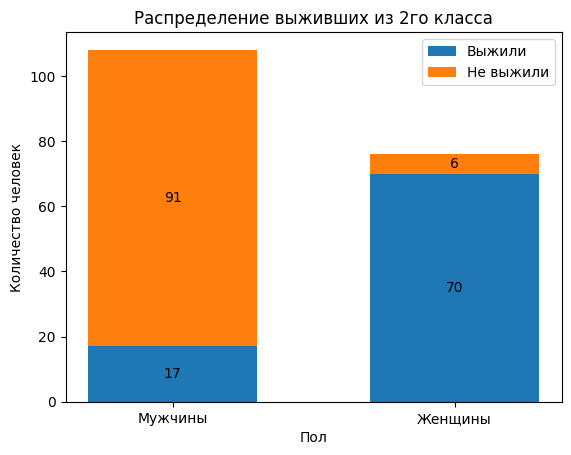

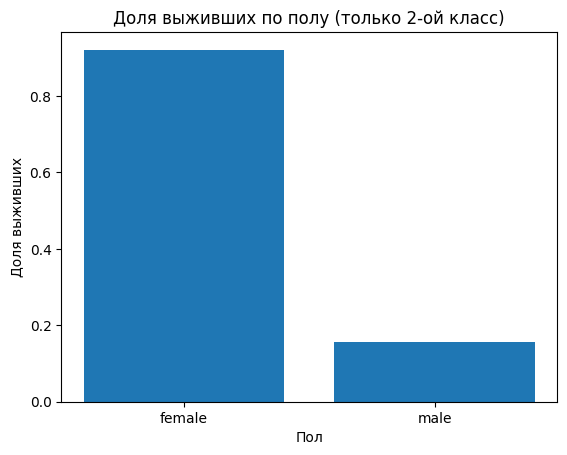

В 2-ом классе доля выживших составила: Женщины: 92.11%, Мужчины: 15.74%.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#количество выживших мужчин и женщин из 2 класса
males_from_2st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==2))])
females_from_2st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==2))])
survived_males_2st=len(df.loc[((df['Sex']=='male') & (df['Pclass']==2) & (df['Survived']==1))])
survived_females_2st=len(df.loc[((df['Sex']=='female') & (df['Pclass']==2)& (df['Survived']==1))])

#Визуализация
count_2st_class = {
    'Выжили': [survived_males_2st, survived_females_2st],
    'Не выжили': [males_from_2st_class-survived_males_2st, females_from_2st_class-survived_females_2st]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in count_2st_class.items():
    p=ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label = key, bottom=bottom)
    bottom+=count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших из 2го класса')
ax.set_ylabel('Количество человек')
ax.set_xlabel('Пол')
ax.legend()
plt.show()

#Рассчитываем долю выживших

# Пассажиры только 2го класса
df_class2 = df[df['Pclass'] == 2].copy()

#  Рассчет доли выживших по полу для 2го класса
survived_by_sex_class2 = df_class2.groupby('Sex')['Survived'].mean().reset_index()

# Доля выживших женщин
female_survival2 = survived_by_sex_class2[survived_by_sex_class2['Sex'] == 'female']['Survived'].iloc[0]

# Доля выживших мужчин
male_survival2 = survived_by_sex_class2[survived_by_sex_class2['Sex'] == 'male']['Survived'].iloc[0]

# Визуализация
fig, ax = plt.subplots()
bottom = np.zeros(2)

plt.bar(
    survived_by_sex_class2['Sex'],
    survived_by_sex_class2['Survived'],
)

ax.set_title('Доля выживших по полу (только 2-ой класс)')
ax.set_ylabel('Доля выживших')
ax.set_xlabel('Пол')
plt.show()

# Вывод фактических значений
print(
    f"В 2-ом классе доля выживших составила: "
    f"Женщины: {female_survival2*100:.2f}%, "
    f"Мужчины: {male_survival2*100:.2f}%."
)

Видим, что выжило 70 женщин и всего 17 мужчин

И также рассчитываем для 3 класса

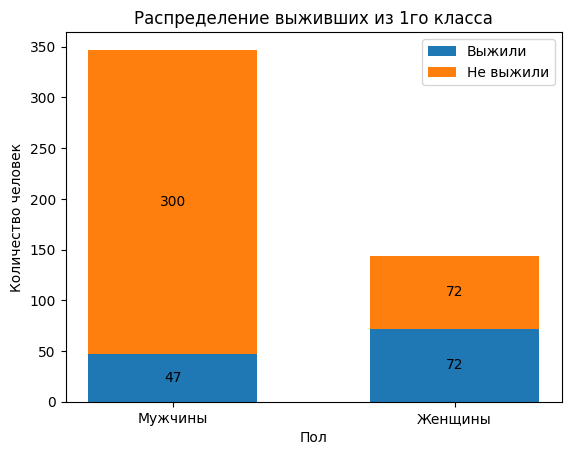

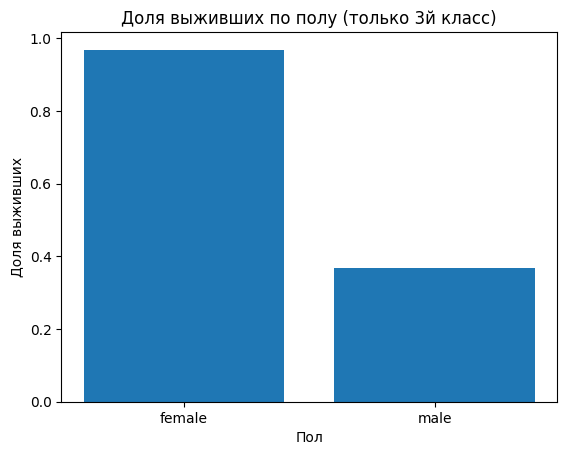

В 3м классе доля выживших составила: Женщины: 50.00%, Мужчины: 13.54%.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#количество выживших мужчин и женщин из 3 класса
males_from_3st_class=len(df.loc[((df['Sex']=='male') & (df['Pclass']==3))])
females_from_3st_class=len(df.loc[((df['Sex']=='female') & (df['Pclass']==3))])
survived_males_3st=len(df.loc[((df['Sex']=='male') & (df['Pclass']==3) & (df['Survived']==1))])
survived_females_3st=len(df.loc[((df['Sex']=='female') & (df['Pclass']==3)& (df['Survived']==1))])

#Визуализация
count_3st_class = {
    'Выжили': [survived_males_3st, survived_females_3st],
    'Не выжили': [males_from_3st_class-survived_males_3st, females_from_3st_class-survived_females_3st]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in count_3st_class.items():
    p=ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label = key, bottom=bottom)
    bottom+=count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших из 1го класса')
ax.set_ylabel('Количество человек')
ax.set_xlabel('Пол')
ax.legend()
plt.show()

#Рассчитываем долю выживших

# Пассажиры только 3го класса
df_class3 = df[df['Pclass'] == 3].copy()

#  Рассчет доли выживших по полу для 3го класса
survived_by_sex_class3 = df_class3.groupby('Sex')['Survived'].mean().reset_index()

# Доля выживших женщин
female_survival3 = survived_by_sex_class3[survived_by_sex_class3['Sex'] == 'female']['Survived'].iloc[0]

# Доля выживших мужчин
male_survival3 = survived_by_sex_class3[survived_by_sex_class3['Sex'] == 'male']['Survived'].iloc[0]

# Визуализация
fig, ax = plt.subplots()
bottom = np.zeros(2)

plt.bar(
    survived_by_sex_class1['Sex'],
    survived_by_sex_class1['Survived'],
)

ax.set_title('Доля выживших по полу (только 3й класс)')
ax.set_ylabel('Доля выживших')
ax.set_xlabel('Пол')
plt.show()

# Вывод фактических значений
print(
    f"В 3м классе доля выживших составила: "
    f"Женщины: {female_survival3*100:.2f}%, "
    f"Мужчины: {male_survival3*100:.2f}%."
)

Здесь выжило 72 женщины и 47 мужчин

Во всех 3 случаях мы видим, что действительно в большинстве выживали женщины не зависимо от класса. То есть теория подтвердилась

Далее распределим выживших женщин по возрастам

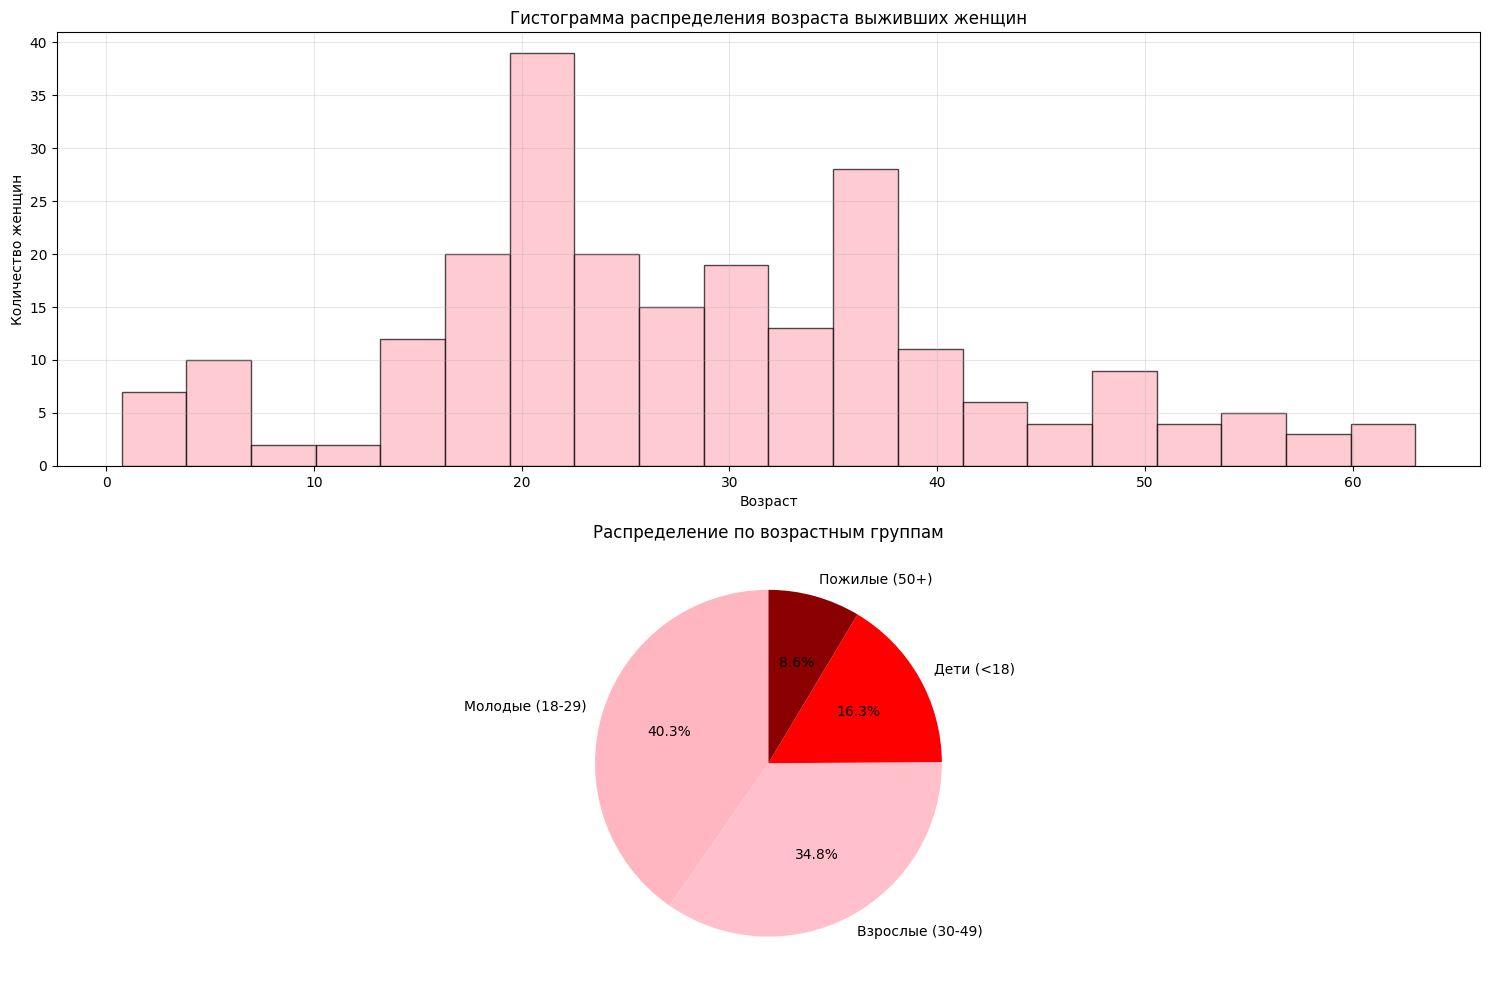

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Функция для возрастных групп 
def age_group_women(age):
    if pd.isna(age):
        return 'Неизвестно'
    elif age < 18:
        return 'Дети (<18)'
    elif age < 30:
        return 'Молодые (18-29)'
    elif age < 50:
        return 'Взрослые (30-49)'
    else:
        return 'Пожилые (50+)'

# Только выжившие женщины
survived_women = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма распределения возраста
plt.subplot(2, 1, 1)
plt.hist(survived_women['Age'].dropna(), bins=20, alpha=0.7, color='lightpink', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество женщин')
plt.title('Гистограмма распределения возраста выживших женщин')
plt.grid(True, alpha=0.3)


# Круговая диаграмма по возрастам женщин
plt.subplot(2, 1, 2)

# Создаем временную колонку с возрастными группами
temp_age_groups_women = survived_women['Age'].apply(age_group_women)
age_groups_women = temp_age_groups_women.value_counts()

group_labels_women = list(age_groups_women.index)
group_counts_women = list(age_groups_women.values)
colors_pie = ['lightpink', 'pink', 'red', 'darkred', 'gray']

plt.pie(group_counts_women, labels=group_labels_women, autopct='%1.1f%%', colors=colors_pie, startangle=90)
plt.title('Распределение по возрастным группам')

plt.tight_layout()
plt.show()



Мы видим, что в основном выжили женщины возрастом от 18 до 29 лет (40,3%)

Также рассмотрим выживших мужчин по возрастам

<function matplotlib.pyplot.show(close=None, block=None)>

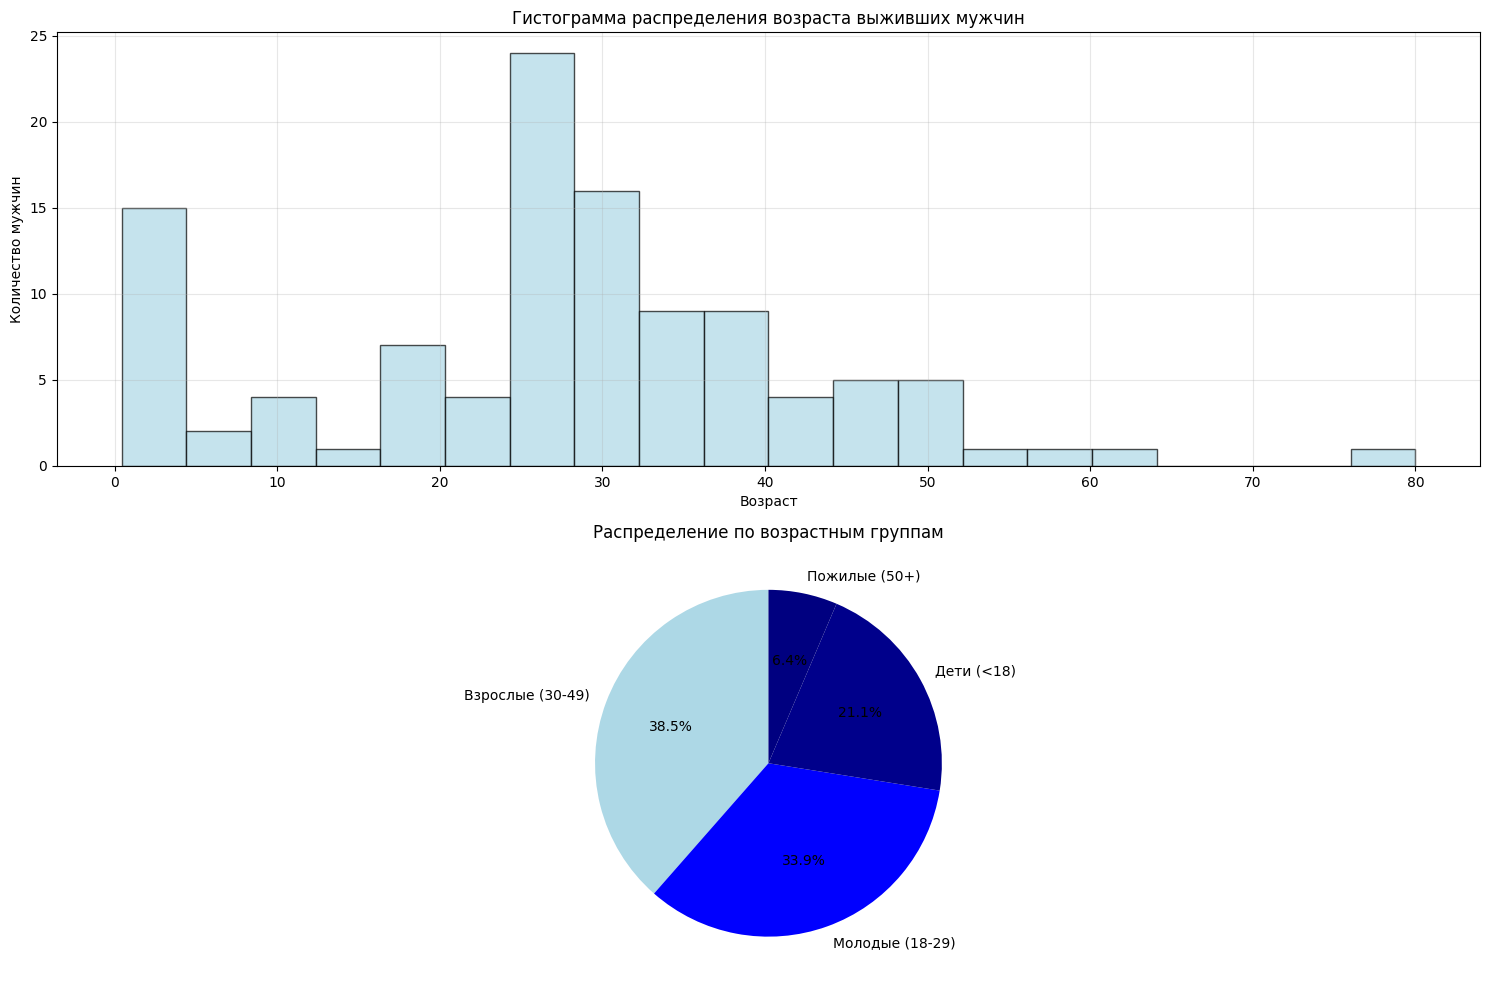

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Функция для возрастных групп 
def age_group_men(age):
    if pd.isna(age):
        return 'Неизвестно'
    elif age < 18:
        return 'Дети (<18)'
    elif age < 30:
        return 'Молодые (18-29)'
    elif age < 50:
        return 'Взрослые (30-49)'
    else:
        return 'Пожилые (50+)'

# Только выжившие мужчины
survived_men = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма распределения возраста
plt.subplot(2, 1, 1)
plt.hist(survived_men['Age'].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество мужчин')
plt.title('Гистограмма распределения возраста выживших мужчин')
plt.grid(True, alpha=0.3)

# Круговая диаграмма
plt.subplot(2, 1, 2)

# Создаем временную колонку с возрастными группами
temp_age_groups_men = survived_men['Age'].apply(age_group_men)
age_groups_men = temp_age_groups_men.value_counts()

group_labels_men = list(age_groups_men.index)
group_counts_men = list(age_groups_men.values)
colors_pie = ['lightblue', 'blue', 'darkblue', 'navy', 'gray']

plt.pie(group_counts_men, labels=group_labels_men, autopct='%1.1f%%', colors=colors_pie, startangle=90)
plt.title('Распределение по возрастным группам')

plt.tight_layout()
plt.show

В основном выжили взрослые мужчины от 30 до 49 лет (38.5%)

Узнаем как много людей было с детьми/родителями

Всего пассажиров: 891
Пассажиров с детьми/родителями: 213 (23.9%)
Пассажиров с родственниками: 354 (39.7%)
Пассажиров в одиночку: 537 (60.3%)


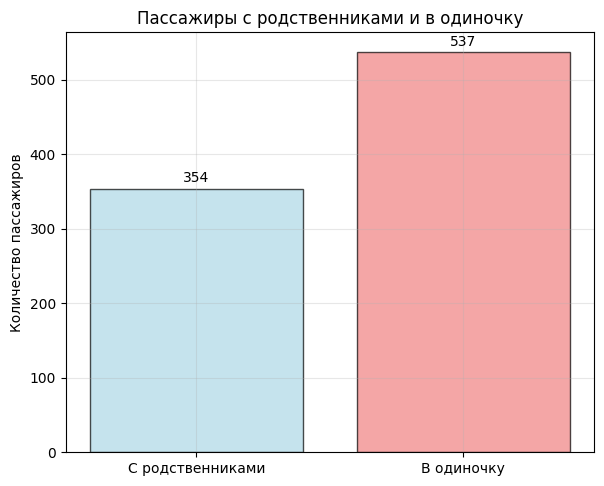

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем дополнительные колонки для анализа
df['With_Children'] = df['Parch'] > 0  # С детьми/родителями
df['With_Family'] = (df['SibSp'] + df['Parch']) > 0  # С любыми родственниками
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1  # Размер семьи (включая самого пассажира)

# Общая статистика
total_passengers = len(df)
with_children = df['With_Children'].sum()
with_family = df['With_Family'].sum()
alone = total_passengers - with_family

print(f"Всего пассажиров: {total_passengers}")
print(f"Пассажиров с детьми/родителями: {with_children} ({with_children/total_passengers*100:.1f}%)")
print(f"Пассажиров с родственниками: {with_family} ({with_family/total_passengers*100:.1f}%)")
print(f"Пассажиров в одиночку: {alone} ({alone/total_passengers*100:.1f}%)")

# Визуализация
plt.figure(figsize=(15, 12))

# Распределение по наличию семьи
plt.subplot(2, 2, 1)
family_status = ['С родственниками', 'В одиночку']
family_counts = [with_family, alone]
colors = ['lightblue', 'lightcoral']

plt.bar(family_status, family_counts, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Количество пассажиров')
plt.title('Пассажиры с родственниками и в одиночку')
for i, count in enumerate(family_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)


Теперь узнаем кого выживало больше

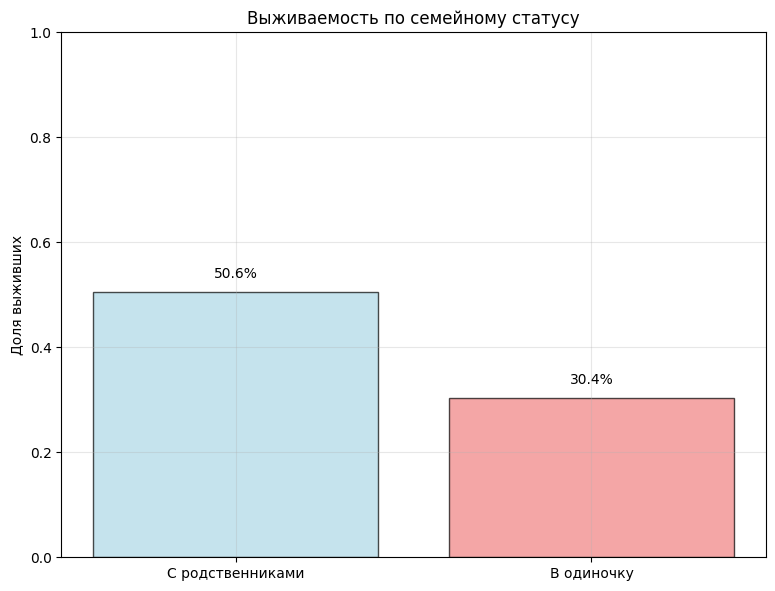

In [16]:
# Визуализация выживаемости по семейному статусу
plt.figure(figsize=(20, 15)) 
plt.subplot(2, 2, 1)
alone_survival = df[df['With_Family'] == False]['Survived'].mean()
family_survival = df[df['With_Family'] == True]['Survived'].mean()

survival_rates = [family_survival, alone_survival]
plt.bar(family_status, survival_rates, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Доля выживших')
plt.title('Выживаемость по семейному статусу')
plt.ylim(0, 1)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 0.02, f'{rate:.1%}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

Мы видим, что больше выживали люди с родственниками

Теперь посмотрим сколько всего было родителей, сколько из них матери, сколько из них отцы. А также посмотрим на их выживаемость

Взрослых с детьми: 132
Мужчин с детьми: 50
Женщин с детьми: 82
Выживаемость родителей: 48.5%
Выживаемость отцов: 16.0%
Выживаемость матерей: 68.3%


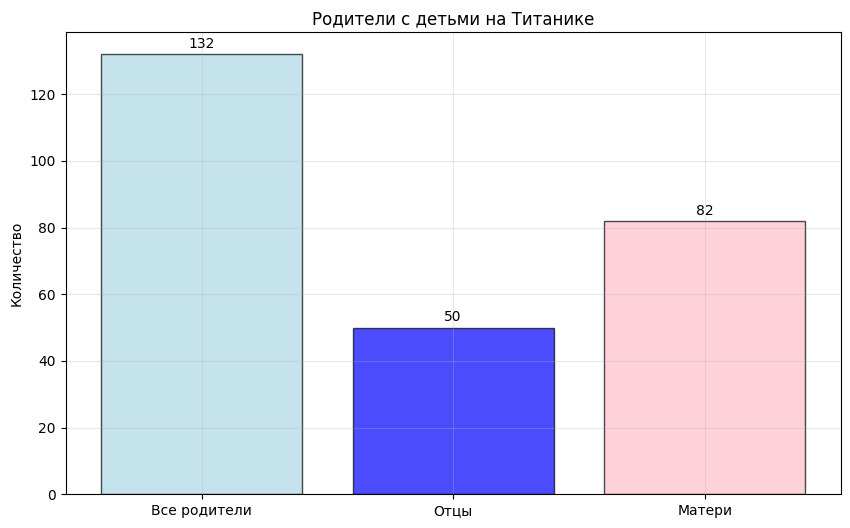

In [17]:
# Находим взрослых с детьми
adults_with_children = df[(df['Parch'] > 0) & (df['Age'] >= 18)]
print(f"Взрослых с детьми: {len(adults_with_children)}")

# Распределяем по полу
men_with_children = adults_with_children[adults_with_children['Sex'] == 'male']
women_with_children = adults_with_children[adults_with_children['Sex'] == 'female']

print(f"Мужчин с детьми: {len(men_with_children)}")
print(f"Женщин с детьми: {len(women_with_children)}")

# Выживаемость родителей
if len(adults_with_children) > 0:
    parents_survival = adults_with_children['Survived'].mean()
    men_survival = men_with_children['Survived'].mean() if len(men_with_children) > 0 else 0
    women_survival = women_with_children['Survived'].mean() if len(women_with_children) > 0 else 0
    
    print(f"Выживаемость родителей: {parents_survival:.1%}")
    print(f"Выживаемость отцов: {men_survival:.1%}")
    print(f"Выживаемость матерей: {women_survival:.1%}")

# Визуализация родителей с детьми
plt.figure(figsize=(10, 6))

parent_categories = ['Все родители', 'Отцы', 'Матери']
parent_counts = [len(adults_with_children), len(men_with_children), len(women_with_children)]
parent_colors = ['lightblue', 'blue', 'pink']

plt.bar(parent_categories, parent_counts, color=parent_colors, alpha=0.7, edgecolor='black')
plt.ylabel('Количество')
plt.title('Родители с детьми на Титанике')
for i, count in enumerate(parent_counts):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.show()

Мы видим, что больше было матерей с детьми (82) и их же выжило больше (68.3%)

Проверим были ли на борту дети без родителей и посмотрим на их выживаемость

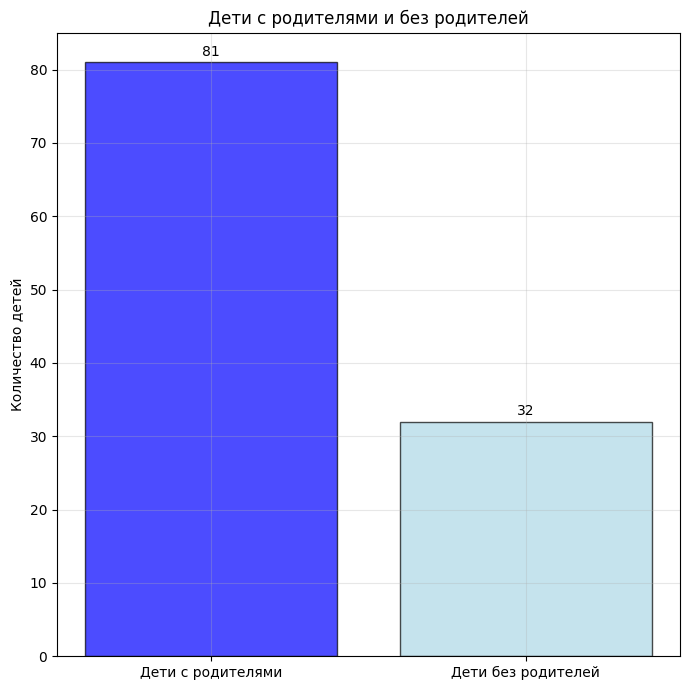

Всего детей было 113, из них с родителями 81, а без родителей 32


In [18]:
# Визуализация
plt.figure(figsize=(7, 7))
children = df[df['Age'] < 18]  # Дети до 18 лет
children_with_parents = children[children['Parch'] > 0]
children_alone = children[children['Parch'] == 0]

child_categories = ['Дети с родителями', 'Дети без родителей']
child_counts = [len(children_with_parents), len(children_alone)]
child_colors = ['blue', 'lightblue']

plt.bar(child_categories, child_counts, color=child_colors, alpha=0.7, edgecolor='black')
plt.ylabel('Количество детей')
plt.title('Дети с родителями и без родителей')
for i, count in enumerate(child_counts):
    plt.text(i, count + 0.5, f'{count}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Всего детей было {len(children)}, из них с родителями {child_counts[0]}, а без родителей {child_counts[1]}')


Выживаемость детей с родителями: 55.6%
Выживаемость детей без родителей: 50.0%


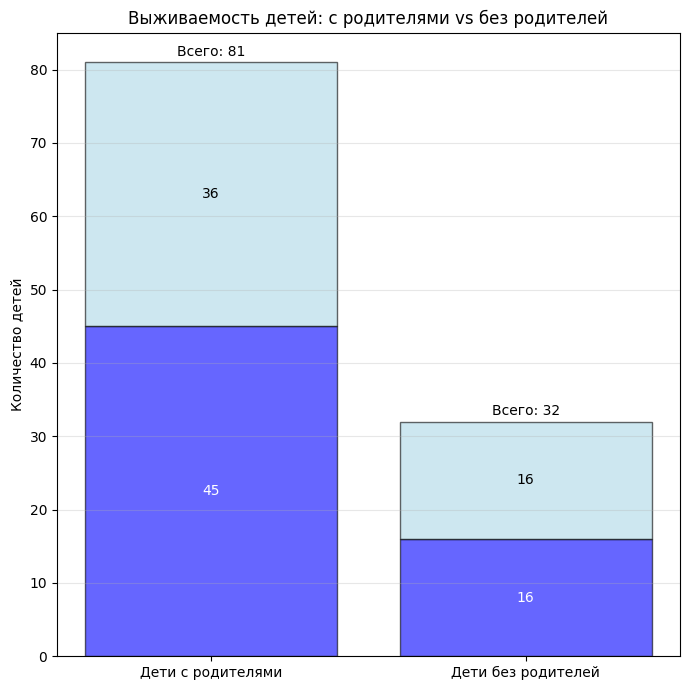

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Сначала определяем детей и разделяем их на категории
children = df[df['Age'] < 18]  # Дети до 18 лет
children_with_parents = children[children['Parch'] > 0]  # Дети с родителями
children_alone = children[children['Parch'] == 0]  # Дети без родителей

# Создаем данные для визуализации
children_with_parents_survived = len(children_with_parents[children_with_parents['Survived'] == 1])
children_with_parents_not_survived = len(children_with_parents[children_with_parents['Survived'] == 0])

children_alone_survived = len(children_alone[children_alone['Survived'] == 1]) if len(children_alone) > 0 else 0
children_alone_not_survived = len(children_alone[children_alone['Survived'] == 0]) if len(children_alone) > 0 else 0

# Рассчитываем проценты выживаемости
children_with_parents_survival = children_with_parents_survived / len(children_with_parents) if len(children_with_parents) > 0 else 0
children_alone_survival = children_alone_survived / len(children_alone) if len(children_alone) > 0 else 0

# Визуализация
plt.figure(figsize=(7, 7))

categories = ['Дети с родителями', 'Дети без родителей']
total_counts = [len(children_with_parents), len(children_alone)]
survived_counts = [children_with_parents_survived, children_alone_survived]
not_survived_counts = [children_with_parents_not_survived, children_alone_not_survived]

bars_survived = plt.bar(categories, survived_counts, color=['blue'], 
                       alpha=0.6, edgecolor='black', label='Выжили')
bars_not_survived = plt.bar(categories, not_survived_counts, bottom=survived_counts,
                           color=['lightblue'], alpha=0.6, edgecolor='black', label='Не выжили')

plt.ylabel('Количество детей')
plt.title('Выживаемость детей: с родителями vs без родителей')

for i, (total, survived, not_survived) in enumerate(zip(total_counts, survived_counts, not_survived_counts)):
    if total > 0:
        # Общее количество
        plt.text(i, total + 0.5, f'Всего: {total}', ha='center', va='bottom')
        
        # Выжившие 
        if survived > 0:
            plt.text(i, survived / 2, f'{survived}', ha='center', va='center', color='white')
        
        # Не выжившие
        if not_survived > 0:
            plt.text(i, survived + not_survived / 2, f'{not_survived}', ha='center', va='center', color='black')

plt.grid(True, alpha=0.3, axis='y')



print(f"\nВыживаемость детей с родителями: {children_with_parents_survival:.1%}")
if len(children_alone) > 0:
    print(f"Выживаемость детей без родителей: {children_alone_survival:.1%}")


plt.tight_layout()
plt.show()

Мы видим,что детей, котрые были на борту с родителями, выжило больше на 5.6%

Теперь рассмотрим титулы пассажиров

Все уникальные титулы:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Распределение титулов
Mr: 517 пассажиров (58.0%)
Miss: 182 пассажиров (20.4%)
Mrs: 125 пассажиров (14.0%)
Master: 40 пассажиров (4.5%)
Professional: 13 пассажиров (1.5%)
Nobility: 5 пассажиров (0.6%)
Military: 5 пассажиров (0.6%)
Rare: 4 пассажиров (0.4%)


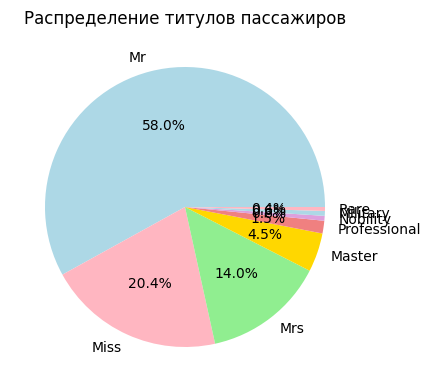

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Извлекаем титулы из имен
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


# Посмотрим все уникальные титулы
unique_titles = df['Title'].value_counts()
print("Все уникальные титулы:")
print(unique_titles)

# Группируем редкие титулы
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss', 
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'Col': 'Military',
    'Major': 'Military',
    'Mlle': 'Rare',
    'Countess': 'Nobility',
    'Ms': 'Rare',
    'Lady': 'Nobility',
    'Jonkheer': 'Nobility',
    'Don': 'Nobility',
    'Dona': 'Nobility',
    'Mme': 'Rare',
    'Capt': 'Military',
    'Sir': 'Nobility'
}

df['Title_Group'] = df['Title'].map(title_mapping)
df['Title_Group'] = df['Title_Group'].fillna('Rare')  # Все остальные в Rare

# Визуализация
plt.figure(figsize=(15, 10))

# Распределение титулов
plt.subplot(2, 2, 1)
title_counts = df['Title_Group'].value_counts()
colors = ['lightblue', 'lightpink', 'lightgreen', 'gold', 'lightcoral', 'plum']
plt.pie(title_counts.values, labels=title_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Распределение титулов пассажиров')

# Выведем значения отдельно, так как на диаграмме плохо видно

print("Распределение титулов")
for title, count in title_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{title}: {count} пассажиров ({percentage:.1f}%)")

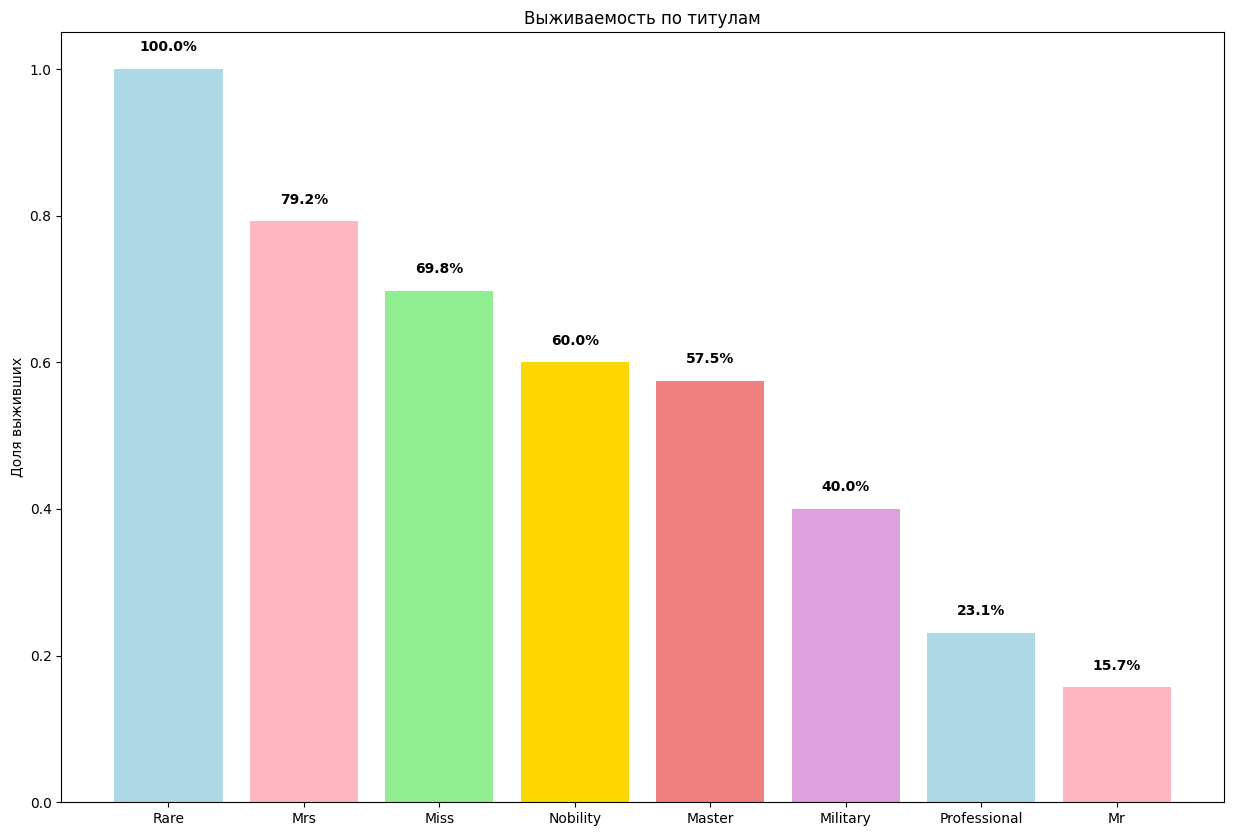

In [21]:
# Выживаемость по титулам
plt.figure(figsize=(15, 10))
title_survival = df.groupby('Title_Group')['Survived'].mean().sort_values(ascending=False)
bars = plt.bar(title_survival.index, title_survival.values, color=colors[:len(title_survival)])
plt.ylabel('Доля выживших')
plt.title('Выживаемость по титулам')
for bar, rate in zip(bars, title_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2, rate + 0.02, f'{rate:.1%}', 
             ha='center', va='bottom', fontweight='bold')

Женщины и дети (титулы Mrs, Miss, Master) имели значительно более высокие шансы на спасение, в то время как взрослые мужчины (Mr) — самые низкие. А также выжили все пассажиры с редкими титулами

<Figure size 1500x1000 with 0 Axes>

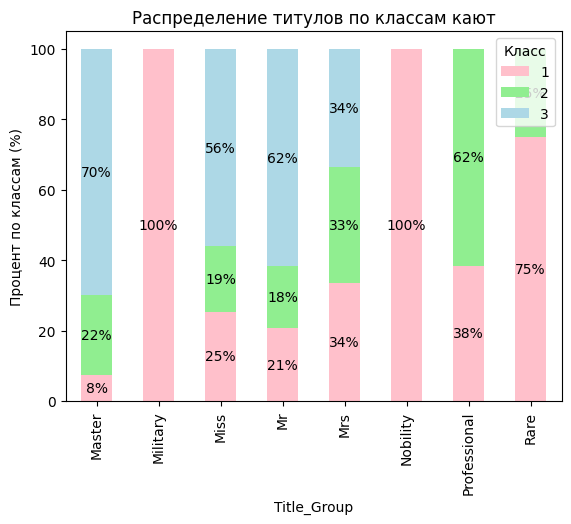

In [22]:

# Распределение по классам
plt.figure(figsize=(15, 10))
title_class = pd.crosstab(df['Title_Group'], df['Pclass'], normalize='index') * 100
title_class.plot(kind='bar', stacked=True, color=['pink', 'lightgreen', 'lightblue'])
plt.ylabel('Процент по классам (%)')
plt.title('Распределение титулов по классам кают')
plt.legend(title='Класс')

# Добавляем числовые значения на столбцы
for i, (idx, row) in enumerate(title_class.iterrows()):
    cumulative_height = 0
    for j, (pclass, value) in enumerate(row.items()):
        if value > 0: 
            x_pos = i
            y_pos = cumulative_height + value / 2
            plt.text(x_pos, y_pos, f'{value:.0f}%', 
                    ha='center', va='center', color='black')
        cumulative_height += value

plt.show()

Видим, что Mr (Мистеры) - равномерно распределены по всем классам, Mrs и Miss - преобладают в 1-м и 2-м классе, Nobility (Дворянство) - 100% в 1-м классе, Rare (Редкие титулы) - также исключительно в 1-м классе, Professional - в основном 1-й и 2-й класс (доктора, священники высшего ранга), Master (мальчики) - в основном 2-й и 3-й класс, Military - равномерное распределение между 1-м и 2-м классом


Распределение палуб по классам:
Pclass     1    2    3  All
Deck                       
A         15    0    0   15
B         47    0    0   47
C         59    0    0   59
D         29    4    0   33
E         25    4    3   32
F          0    8    5   13
G          0    0    4    4
T          1    0    0    1
Unknown   40  168  479  687
All      216  184  491  891


<Figure size 1400x800 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

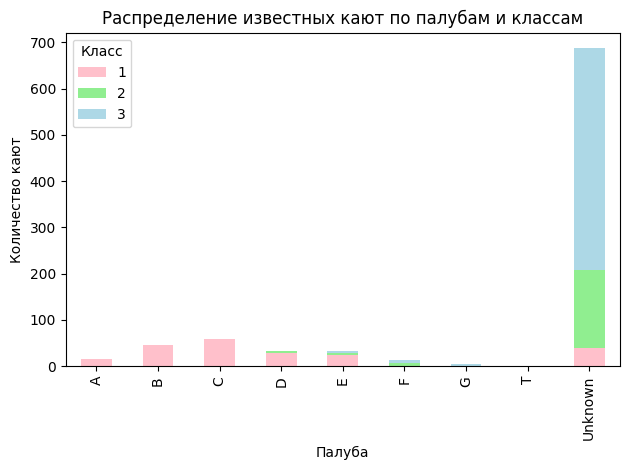

In [23]:
# Сначала извлекаем букву каюты (палубу)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'Unknown')

# Анализ распределения палуб по классам
deck_by_class = pd.crosstab(df['Deck'], df['Pclass'], margins=True)
print("\nРаспределение палуб по классам:")
print(deck_by_class)

# Визуализация распределения кают по классам
plt.figure(figsize=(14, 8))

# Распределение палуб по классам
known_cabins = df[df['Cabin'].notna()]
deck_class_known = pd.crosstab(known_cabins['Deck'], known_cabins['Pclass'])
plt.figure(figsize=(10,15))
deck_class_known.plot(kind='bar', stacked=True, color=['pink', 'lightgreen', 'lightblue'])
plt.title('Распределение известных кают по палубам и классам')
plt.xlabel('Палуба')
plt.ylabel('Количество кают')
plt.legend(title='Класс')
plt.tight_layout()
plt.show()



Мы видим,что в основном данные были утеряны о каютах 2-го и 3-го классов, оствльное распределение:
* Палубы A-B-C: Практически исключительно 1-й класс (самые дорогие каюты)

* Палуба D: Смешанная (2-й и 1-й классы), но в основном 1-й 

* Палуба E: Смешанная (1-й и 2-й классы)

* Палуба F: 2-й и 3-й классы

* Палуба G: Исключительно 3-й класс (самые дешевые каюты)


Дальше мы рассмотрим связь портов и классов пассажиров

Распределение классов по портам посадки:
Embarked   C   Q    S
Pclass               
1         85   2  129
2         17   3  164
3         66  72  353


<Figure size 1500x1200 with 0 Axes>

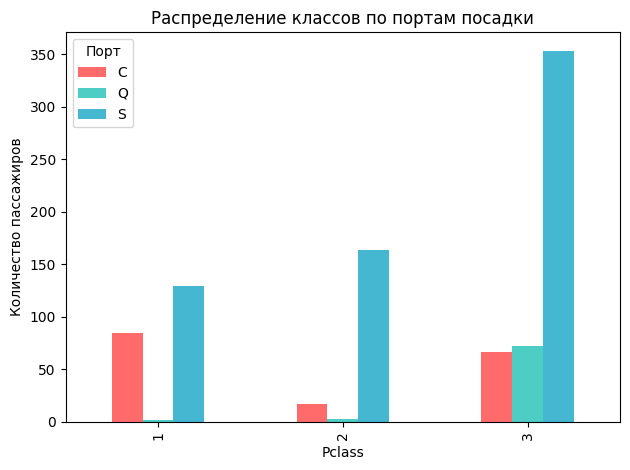

In [24]:
# Анализ распределения классов по портам посадки
class_embarked = pd.crosstab(df['Pclass'], df['Embarked'])

print("Распределение классов по портам посадки:")
print(class_embarked)

# Визуализация
plt.figure(figsize=(15, 12))

class_embarked.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Распределение классов по портам посадки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Порт')

plt.tight_layout()
plt.show()


Мы видим, что пассажиры из 1-го класса в основном садились в портах C и S, 2-го класса таже в C и S, но в основном в S, и пассажиры 3-го класса чаще садились в порте S, но в отличие от других классов мы видим, что гораздо больше людей садились в порте Q

Теперь рассмотрим среднюю цену билетов в каждом порту

<Figure size 1500x1200 with 0 Axes>

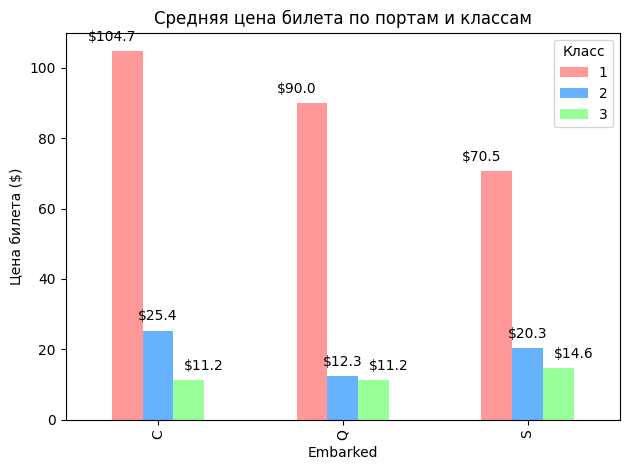

In [25]:
# Визуализация средней цены билета по портам и классам
plt.figure(figsize=(15, 12))
fare_by_class_embarked = df.groupby(['Embarked', 'Pclass'])['Fare'].mean().unstack()
fare_by_class_embarked.plot(kind='bar',
                          color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Средняя цена билета по портам и классам')
plt.ylabel('Цена билета ($)')
plt.legend(title='Класс')

for i, (embarked, fares) in enumerate(fare_by_class_embarked.iterrows()):
    for j, (pclass, fare) in enumerate(fares.items()):
        if not np.isnan(fare): 
            plt.text(i + j*0.25 - 0.25, fare + 2, f'${fare:.1f}', ha='center', va='bottom')



plt.tight_layout()
plt.show()

В порту С мы видим самые дорогие билеты у 1-го и 2-го класса, а самые дорогие билеты у 3-го класса в порту S

In [26]:
# Проведём анализ выживаемости по комбинации класс-порт

survival_by_class_embarked = df.groupby(['Pclass', 'Embarked'])['Survived'].agg(['mean']).round(3)
survival_by_class_embarked['mean'] = survival_by_class_embarked['mean'] * 100
survival_by_class_embarked.columns = ['Выживаемость %']

print(survival_by_class_embarked)

                 Выживаемость %
Pclass Embarked                
1      C                   69.4
       Q                   50.0
       S                   58.9
2      C                   52.9
       Q                   66.7
       S                   46.3
3      C                   37.9
       Q                   37.5
       S                   19.0


Для 1-го класса самый большой процент выжимаемости у людей, севших в порте C (самые дорогие билеты), для 2-го класса самый большой процент в порте Q, а для 3-го - в порте C

Также даже из этой таблицы видно, что у людей из 1-го класса была выше вероятность выжить

Мы можем сделать следующие выводы:
* Была проведена обработка пропущенных данных: 177 пропусков в колонке возраста заполнены медианными значениями с группировкой по классу и полу. Два пропуска в колонке порта посадки заполнены модой. 687 пропусков в данных о каютах заменены на значение 'Unknown'.

* С помощью корреляционного анализы мы вывели следующие закономерности: наибольшая положительная корреляция с выживаемостью наблюдается у стоимости билета (0.257), что указывает на прямую зависимость между материальным состоянием пассажира и его шансами на выживание. При этом класс билета демонстрирует наиболее сильную отрицательную корреляцию (-0.338), подтверждая, что пассажиры низших классов имели значительно меньшие шансы на выживание. Распределение пассажиров по классам показало, что в третьем классе было максимальное количество человек (491), при этом мужчин было более чем в два раза больше, чем женщин, в других класса число мужчин и женщин разнится не так сильно.

* Детальный анализ выживаемости в первом классе подтвердил теорию "женщины и дети первыми" - доля выживших женщин составила 96.81%, в то время как среди мужчин выжило лишь 36.89%. Это почти трехкратное различие подтверждает, что гендерный фактор был одним из ключевых для выживания, особенно среди пассажиров высшего класса. 

**Векторизация**

In [27]:
# Самый простой способ - перезагрузить данные
df_clean = pd.read_csv('/kaggle/input/titanic-df/Titanic.csv')

# И применить только необходимые преобразования
# Заполнение пропусков (как в вашем EDA)
df_clean['Age'] = df_clean.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
df_clean['Cabin'] = df_clean['Cabin'].fillna('Unknown')

Смотрим какие типы имеют колонки

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    object 
 11  Embarked       891 non-null    object 
 12  With_Children  891 non-null    bool   
 13  With_Family    891 non-null    bool   
 14  Family_Size    891 non-null    int64  
 15  Title          891 non-null    object 
 16  Title_Group    891 non-null    object 
 17  Deck           891 non-null    object 
dtypes: bool(2)

Записываем все колонки с типом object

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Title_Group',
       'Deck'],
      dtype='object')

Переводим данные в числовой тип

In [30]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    int64  
 4   Sex            891 non-null    int64  
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    int64  
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    int64  
 11  Embarked       891 non-null    int64  
 12  With_Children  891 non-null    bool   
 13  With_Family    891 non-null    bool   
 14  Family_Size    891 non-null    int64  
 15  Title          891 non-null    int64  
 16  Title_Group    891 non-null    int64  
 17  Deck           891 non-null    int64  
dtypes: bool(2)

In [32]:
# Проверяем пропуски
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
With_Children    0
With_Family      0
Family_Size      0
Title            0
Title_Group      0
Deck             0
dtype: int64

Рассмотрим корреляцию с таргетом Survived

In [33]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Children,With_Family,Family_Size,Title,Title_Group,Deck
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.039033,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013128,0.005167,-0.057462,-0.040143,0.021692,0.066656,-0.030939
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.059579,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.167675,0.147408,0.203367,0.016639,-0.201345,-0.054077,-0.301116
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.413583,0.083081,0.018443,0.319869,-0.549500,0.684121,0.162098,-0.027526,-0.135207,0.065997,0.045541,-0.163459,0.746616
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.031926,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.006117,-0.045107,-0.070722,-0.036309,-0.022484,0.003910,0.051093
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.102706,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.108262,-0.247523,-0.303646,-0.200988,0.256407,-0.021369,0.123076
Age,0.039033,-0.059579,-0.413583,0.031926,0.102706,1.000000,-0.249854,-0.175526,-0.095924,0.122692,-0.280059,-0.007833,-0.255146,-0.175529,-0.258456,0.284627,0.429479,-0.295493
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.249854,1.000000,0.414838,0.079461,0.159651,0.043593,0.068230,0.462241,0.584471,0.890712,-0.191786,-0.245288,0.041540
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.175526,0.414838,1.000000,0.020003,0.216225,-0.028324,0.039798,0.845092,0.583398,0.783111,-0.119721,-0.159825,-0.032548
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.095924,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.001729,-0.006982,-0.028314,0.064302,0.025176,-0.050187,0.256307
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.122692,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.224719,0.237717,0.271832,0.217138,-0.086359,-0.008146,-0.523013


In [34]:
# Уберем лишние колонки, которые не нужны для обучения
# PassengerId - просто индекс
# Name, Ticket - сложные строковые данные, из которых мы уже извлекли Title и Deck (через Cabin)

features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title'] 
X = df.drop(columns=['Survived'] + [col for col in features_to_drop if col in df.columns])
y = df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Разделяем на данные для обучения и тесторования 80% на 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



2025-12-24 13:34:24.492079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766583264.780429      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766583264.864420      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
# Обучение Random Forest для анализа важности признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Важность признаков
feature_importances = pd.DataFrame({
    'признак': X.columns,
    'важность': rf.feature_importances_
}).sort_values('важность', ascending=False)

print("Важность признаков по Random Forest:")
print(feature_importances.head(15))

Важность признаков по Random Forest:
          признак  важность
5            Fare  0.216568
2             Age  0.207686
1             Sex  0.206658
10    Title_Group  0.101513
11           Deck  0.063274
0          Pclass  0.062658
9     Family_Size  0.042854
6        Embarked  0.032093
3           SibSp  0.030461
4           Parch  0.020392
8     With_Family  0.008783
7   With_Children  0.007061


Мы видим, что самым важным признаком для выживания является цена билета, а после нее возраст и пол.

In [37]:
# Создаём словарь для хранения результатов 

results = {}

In [61]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)

# Линейная модель (Логистическая регрессия) 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Оценка точноти
acc_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = acc_lr

# Вывод результатов
print(f"Точность логистической регрессии: {acc_lr:.4f}")

Точность логистической регрессии: 0.7989


In [60]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report
)
# Деревья (Random Forest)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train) 
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Оценка точноти
acc_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = acc_rf

# Вывод
print(f"Точность Random Forest: {acc_rf:.4f}")


Точность Random Forest: 0.8324


In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report,
    confusion_matrix
)

# Градиентный бустинг (XGBoost)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Оценка точноти
acc_xgb = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = acc_xgb

# Вывод результатов
print(f"Точность XGBoost: {acc_xgb:.4f}")

Точность XGBoost: 0.8212


In [58]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report
)

# Обучение 
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Получаем вероятности (probs) и классы (0 или 1)
y_pred_nn_probs = model.predict(X_test, verbose=0).flatten()
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)

# Оценка точности
loss, acc_nn = model.evaluate(X_test, y_test, verbose=0)
results['Neural Network'] = acc_nn

# Вывод 
print(f"Accuracy (Общая точность): {acc_nn:.4f}")

Accuracy (Общая точность): 0.8212


Визуализируем точности всех моделей

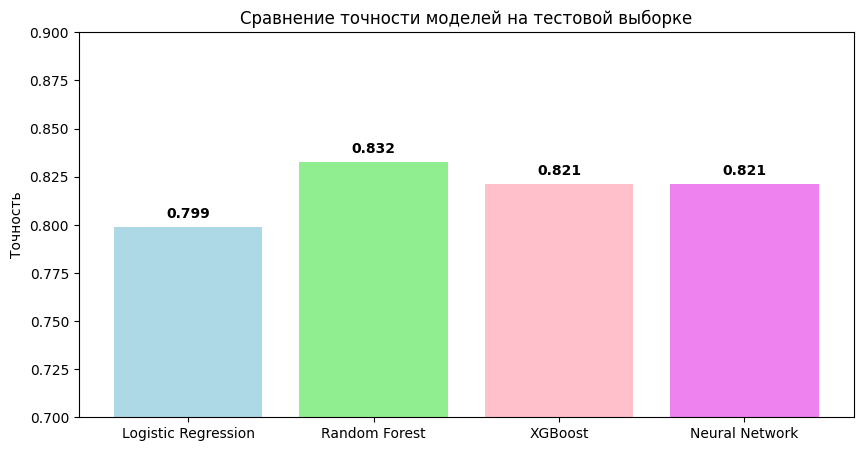

Лучшая модель: Random Forest


In [56]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['lightblue', 'lightgreen', 'pink', 'violet'])
plt.ylim(0.7, 0.9) 
plt.ylabel('Точность')
plt.title('Сравнение точности моделей на тестовой выборке')
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

best_model_name = max(results, key=results.get)
print(f"Лучшая модель: {best_model_name}")

In [62]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Настройка разделения на 5 фолдов
# StratifiedKFold гарантирует, что в каждом фолде будет одинаковый % выживших
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=skf, scoring='accuracy')

# Вывод результатов
print(f"Результаты кросс-валидации по фолдам: {cv_scores}")
print(f"Средняя точность: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

Результаты кросс-валидации по фолдам: [0.79020979 0.85314685 0.85915493 0.78169014 0.83802817]
Средняя точность: 0.8244
Стандартное отклонение: 0.0323


**Вывод: Для построения прогнозной модели были протестированы четыре классификатора: Logistic Regression, Random Forest, XGBoost, Neural Network. Наилучший результат на тестовой выборке показала модель Random Forest со средней точностью 82%.**

**Вывод по всей работе: в рамках данной работы была проведена очистка и подготовка данных, выявлены наиболее значимые факторы, влияющие на выживаемость (пол, цена билета, возраст), и разработана модель на основе модель Random Forest, которая демонстрирует высокую и стабильную прогностическую точность.**